                        ###########################################
                        ############___ELGHAZI_SOUFIANE___#########
                        ###########################################

#                    Assignment 1: Simple Linear Regression using the Boston Housing dataset

###                1. Import the necessary libraries (NumPy, Pandas, Matplotlib).

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns ##to generate the correlation matrix.

###                2. Load the Boston Housing dataset using Pandas.

In [2]:
from sklearn.datasets import load_boston
import warnings

##to delete the warnings to avoid the deprecated warning on the dataset
warnings.simplefilter(action='ignore', category=FutureWarning)

##Next, we'll load and comprehend the housing data from the scikit-learn library
bostonDataset = load_boston()   ### bostonDataset is a dictionary
# let's check what it contains
print(bostonDataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [3]:
## data: It provides information about features that we might use to make predictions, but it does not give the target variable.
print(bostonDataset.data[0])  #printing first row of bostonDataset

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


In [4]:
## feature_names: Contains the names of all the features in the dataset 
print(bostonDataset.feature_names)#printing the feature names of bostonDataset

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
##DESCR: Includes a detailed explanation of the dataset, such as the basic definition of features, what each feature means, which features operate as target variables, whether there are any missing values in the dataset, the dataset's source, and author, and so on.
print(bostonDataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
##The next step is to turn the dataset into a dataframe using pd.DataFrame will allow us to preprocess and visualize the data while also locating acceptable features for prediction
boston = pd.DataFrame(bostonDataset.data, columns=bostonDataset.feature_names)

###                3. Explore the dataset by printing the first few rows and checking the statistics of the dataset.


In [7]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
##The intended value "Price" is missing from the data, as can be seen. We add a new column containing target values to the dataframe.
boston['Price'] = bostonDataset.target

In [10]:
##Checking null values 
boston.isnull().values.any()

False

###             4. Create a scatter plot to visualize the relationship between the dependent variable(MEDV) and the independent                 variable (RM).

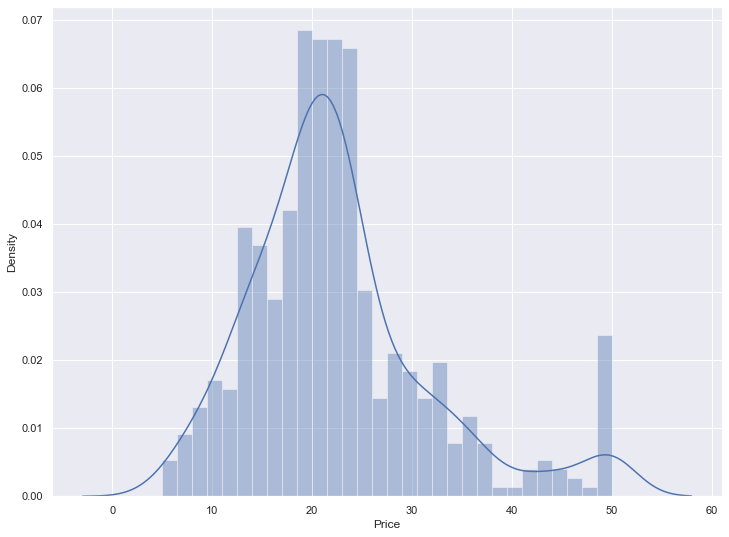

In [11]:
##Let's start with a visualization of the target variable Price’s distribution. We will use the distplot() function from the seaborn library.

sns.set(rc={'figure.figsize':(12,9)}) # fix the figure size
# Create a histogram that depicts the target values' distribution.
sns.distplot(boston['Price'], bins=30)
plt.show()

<AxesSubplot:>

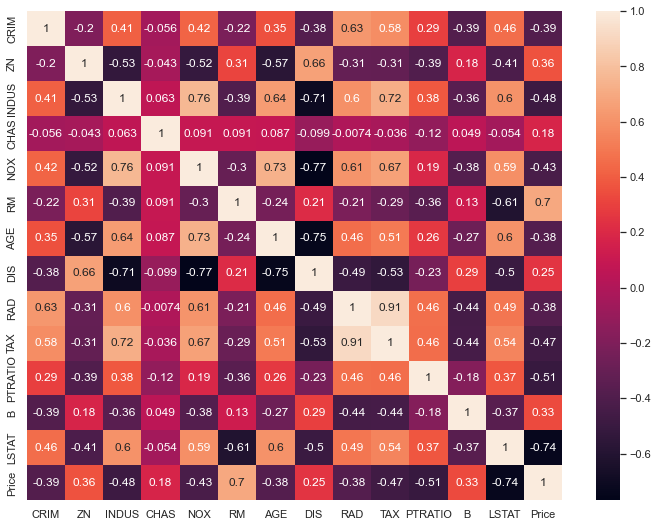

In [12]:
##The correlation matrix will be shown using the heatmap() function from the seaborn library.
sns.heatmap(data=boston.corr(), annot=True) ### annot = True (for printing the values inside the square)

Text(0, 0.5, 'Price')

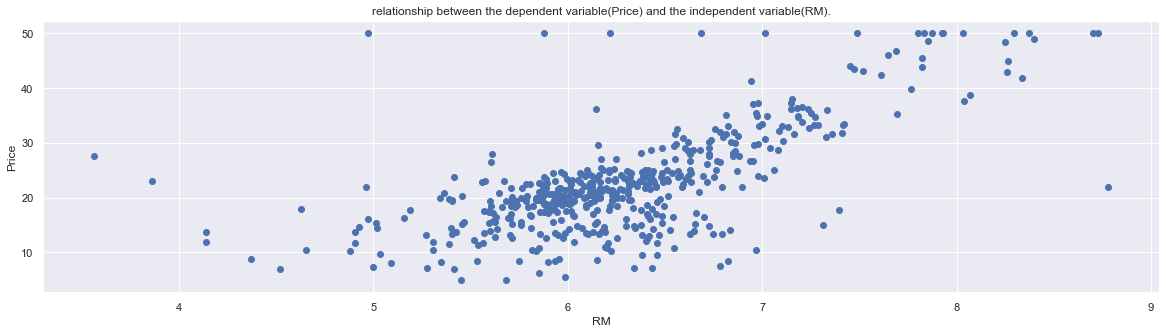

In [13]:
plt.figure(figsize=(20, 5)) 
Y = boston['Price']
X = boston['RM']
plt.scatter(X, Y, marker='o')
plt.title('relationship between the dependent variable(Price) and the independent variable(RM).')
plt.xlabel('RM')
plt.ylabel('Price')


 ###               5. Split the dataset into training and testing sets.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404,)
(102,)
(404,)
(102,)


###                6. Train a simple linear regression model using the training dataset.

In [15]:
###                            Transform the inputs into a matrix (2D object)
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

x_matrix_train = X_train.values.reshape(-1,1)
x_matrix_test = X_test.values.reshape(-1,1)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_matrix_train, Y_train)

LinearRegression()

###                7. Evaluate the model using the testing dataset.

In [17]:
# model evaluation for Test set
predicted_y_test = regressor.predict(x_matrix_test)
predicted_y_test

array([38.10145909, 25.66038564, 23.78098944, 10.44874691, 35.02207282,
       13.96048253, 28.71330154, 26.50743745, 26.41037943, 23.95745857,
       32.59562233, 19.9692563 , 19.85455137, 31.00740019, 24.84862766,
       19.2016156 ,  7.99582605, 14.84282817, 14.71929978, 17.95750826,
       12.09873325, 23.38393391, 40.09556022, 23.47216847, 29.70152865,
       18.81338352, 23.41922773, 21.65453646, 22.88982035, 25.21038937,
       18.83103043, 14.93106273, 19.10455758, 32.39268283, 24.46921904,
       22.97805492, 25.6692091 , 19.18396869, 41.26025646, 29.13682744,
       21.80453522, 11.44579748, 25.55450417, 19.8898452 , 24.94568568,
       27.78683862,  7.0340693 , 19.75749335, 21.17806982, 21.63688955,
       21.2221871 , 20.83395502, 22.62511666, 20.94865996, 17.53398235,
       23.48099193, 36.16029869, 24.73392273, 26.08391155, 19.77514026,
       20.33984147, 20.27807727, 17.39280705, 28.42212748, 21.2221871 ,
       14.35753807, 24.46921904, 21.96335744, 19.75749335, 19.26

###                8. Print the model coefficients (intercept and slope) and the R-squared value of the model.


In [18]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
regressor.intercept_ # f(x)= ax+b=y so b in this case is intercept

-32.839129906011266

In [19]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
regressor.coef_ # f(x)= ax+b=y so a in this case is coef

array([8.82345634])

In [20]:
from sklearn.metrics import  r2_score,mean_squared_error
# r-squared score of the model
r2 = r2_score(Y_test, predicted_y_test)
print("The model's testing set performance")
print("--------------------------------------")
print('R2 score is : {}'.format(r2))
print("--------------------------------------")
# mean_squared_error of the model ----> c'est la même chose que np.mean((y_predict-y_test)**2) ce qui s'appelle fonction du coût
rmse = (np.sqrt(mean_squared_error(Y_test, predicted_y_test)))
print('RMSE score is : {}'.format(rmse))
print("--------------------------------------")

The model's testing set performance
--------------------------------------
R2 score is : 0.6938399401553497
--------------------------------------
RMSE score is : 4.895963186952216
--------------------------------------


###        9. Create a line plot to visualize the relationship between the dependent variable.(MEDV) and the independent variable(RM) along with the predicted values from the model.


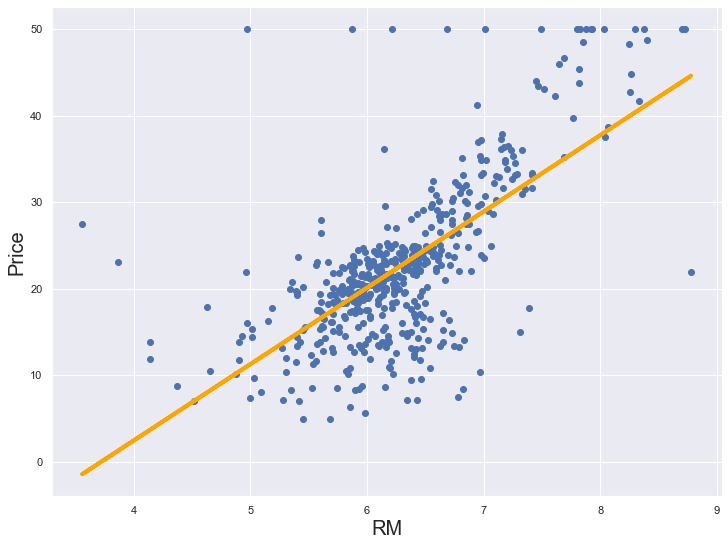

In [21]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(X,Y)

# Parametrized version of the regression line
X_resh=X.values.reshape(-1,1)
yhat = regressor.coef_*X_resh + regressor.intercept_

# Non-parametrized version of the regression line

# Plotting the regression line
fig = plt.plot(X,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('RM', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

 ###              10. Repeat steps 6-9 with different independent variables and compare the results.


In [22]:
##Using the NumPy library's np.c_() function, we concatenate the LSTAT and RM columns.
# because LSTAT has a strong negative correlation with Price (-0.74).
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['Price']
##Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
##Training and testing the model
regressor.fit(X_train, Y_train) 

LinearRegression()

In [23]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
regressor.intercept_

2.73624034260661

In [24]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
regressor.coef_

array([-0.71722954,  4.58938833])

In [25]:
## model evaluation for Test set
 
predicted_y_test = regressor.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, predicted_y_test)))
 
# r-squared score of the model
r2 = r2_score(Y_test, predicted_y_test)
 
print("The model's testing set performance")
print("--------------------------------------")
print('R2 score is : {}'.format(r2))
print("--------------------------------------")
print('RMSE is : {}'.format(rmse))
print("--------------------------------------")


The model's testing set performance
--------------------------------------
R2 score is : 0.6628996975186952
--------------------------------------
RMSE is : 5.137400784702911
--------------------------------------


## I.	What is the relationship between the independent variable RM and the dependent variable MEDV in the Boston Housing dataset?

D’après le nuage des points et la matrice de corrélation on observe que la variable Price et RM sont corrélé positivement (0.7).

## II.How does the R-squared value of the model change when you use different independent variables?


Au début c’était : 0.6938399401553497 après il est devenu 0.6628996975186952 ce qui signifie qu'il a été diminué Donc le premier modèle est meilleur car la valeur de son R au carré est proche de 1 que le deuxième modèle.

## III.What are the pros and cons of using a simple linear regression model?

###                                              Advantages:
La régression linéaire a une complexité temporelle considérablement inférieure à celle de certains des autres algorithmes d'apprentissage automatique. Les équations mathématiques de la régression linéaire sont également assez faciles à comprendre et à interpréter. Par conséquent, la régression linéaire est très facile à maîtriser.
###                                              Inconvénients :
La régression linéaire est limitée aux relations linéaires Par sa nature, la régression linéaire n'examine que les relations linéaires entre les variables dépendantes et indépendantes. Autrement dit, il suppose qu'il existe une relation linéaire entre eux. Parfois, c'est incorrect.